This project is about a team of plantation planners are concerned about the yield of oil palm trees, which seems to fluctuate. They have collected a set of data and needed help in analysing on how external factors influence fresh fruit bunch (FFB) yield. Thus, this work will cover analysis of important factors that influence FFB using Ordinary Least Square (OLS) technique.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from scipy import stats

Initially, the necessary packages are imported for mathematical calculations, dataframe operations, visualizations and statistical equations.

In [2]:
df=pd.read_csv('palm_ffb.csv')

Next, the provided dataset on FFB yield and its identified potential factors imported to the Jupyter Notebook.

In [3]:
df.head(20)

,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
0,01.01.2008,616.4,25.306452,21.3,32.2,184.4,25,777778.3951,1.62
1,01.02.2008,568.9,26.165517,20.9,35.1,140.2,23,767988.2759,1.45
2,01.03.2008,577.6,25.448387,21.3,32.9,280.4,25,783951.9231,1.56
3,01.04.2008,581.1,26.903333,20.6,34.8,173.3,25,788987.0504,1.39
4,01.05.2008,545.4,27.241935,20.9,35.0,140.6,25,813659.7222,1.44
5,01.06.2008,532.5,27.116667,21.4,35.5,182.3,24,829817.5676,1.48
6,01.07.2008,544.7,27.035484,21.2,33.9,201.6,26,814475.3012,1.66
7,01.08.2008,569.9,27.200000,21.7,34.5,283.2,26,782279.5322,1.71
8,01.09.2008,571.7,27.556667,21.2,35.1,176.3,25,795237.6543,1.62
9,01.10.2008,565.3,27.358065,22.1,33.9,217.5,24,765090.8602,1.86


In [4]:
df.shape

(130, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           130 non-null    object 
 1   SoilMoisture   130 non-null    float64
 2   Average_Temp   130 non-null    float64
 3   Min_Temp       130 non-null    float64
 4   Max_Temp       130 non-null    float64
 5   Precipitation  130 non-null    float64
 6   Working_days   130 non-null    int64  
 7   HA_Harvested   130 non-null    float64
 8   FFB_Yield      130 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 9.3+ KB


Here, it can be observed that the dataset is a time series, with Month as its frequency. Overall, the dataset consists of 9 columns and 130 rows, where all of the columns except Date is in the form of float and integer data type.

In [6]:
df.describe()

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,527.646923,26.849918,21.379231,33.851538,188.980769,24.753846,793404.491565,1.602231
std,57.367844,0.651413,0.688971,1.079638,80.237210,1.239289,34440.893854,0.281751
min,380.700000,25.158065,18.900000,31.100000,2.000000,21.000000,683431.944400,1.080000
25%,488.625000,26.442285,21.000000,33.100000,140.300000,24.000000,768966.949100,1.390000
50%,538.300000,26.930645,21.500000,33.900000,182.150000,25.000000,790036.158050,1.585000
75%,571.025000,27.270726,21.800000,34.600000,226.100000,26.000000,821989.235250,1.807500
max,647.300000,28.580000,22.600000,36.000000,496.100000,27.000000,882254.225400,2.270000


The dataset consists of readings collected for 130 months. During that time, average FFB yield recorded is 1.60, where the minimum and maximum range from 1.08 to 2.27. Thus, the standard deviation is 0.28. In terms of working days, on average, 25 days allocated for taking care of the plantation. Average ambient temperature, Soil moisture and precipitation of rain are 26.85, 527.65 and 188.98 respectively.

In [7]:
df.isnull().sum()

Date             0
SoilMoisture     0
Average_Temp     0
Min_Temp         0
Max_Temp         0
Precipitation    0
Working_days     0
HA_Harvested     0
FFB_Yield        0
dtype: int64

The dataset is complete, where there is no null values. 

In [8]:
df.columns

Index(['Date', 'SoilMoisture', 'Average_Temp', 'Min_Temp', 'Max_Temp',
       'Precipitation', 'Working_days', 'HA_Harvested', 'FFB_Yield'],
      dtype='object')

In [9]:
df['Working_days'].unique()

array([25, 23, 24, 26, 22, 27, 21], dtype=int64)

In [10]:
col=['SoilMoisture', 'Average_Temp', 'Min_Temp', 'Max_Temp',
       'Precipitation', 'Working_days', 'HA_Harvested', 'FFB_Yield']

for i in col:
    stat, p = stats.normaltest(df[i])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    alpha = 0.05
    if p > alpha:
        print(i,' looks Gaussian (fail to reject H0)')
        print(' ')
    else:
        print(i,' does not look Gaussian (reject H0)')
        print(' ')

Statistics=3.741, p=0.154
SoilMoisture  looks Gaussian (fail to reject H0)
 
Statistics=2.845, p=0.241
Average_Temp  looks Gaussian (fail to reject H0)
 
Statistics=29.495, p=0.000
Min_Temp  does not look Gaussian (reject H0)
 
Statistics=4.380, p=0.112
Max_Temp  looks Gaussian (fail to reject H0)
 
Statistics=10.670, p=0.005
Precipitation  does not look Gaussian (reject H0)
 
Statistics=10.484, p=0.005
Working_days  does not look Gaussian (reject H0)
 
Statistics=0.240, p=0.887
HA_Harvested  looks Gaussian (fail to reject H0)
 
Statistics=5.716, p=0.057
FFB_Yield  looks Gaussian (fail to reject H0)
 


Normality of distributions of each attributes of this dataset being tested. This is because we are using OLS for the analysis, all of the attributes must be normally ditributed (Gaussian). Normal distribution means the attribute is linear fitted, which is a must for OLS. Using Shapiro-Wilk test, it is discovered that all of the attributes are normally distributed, except Min_Temp and Working_days. However, for ambient temperature, only Average_Temp will be used as Min_Temp, Precipitation and Max_Temp not representative of real ambient temperature where the plantations are growing. Next, the rain Precipitation need to be visualized further to understand the distributions. Lastly, the Working_days are proved to be categorical data, based on df['Working_days'].unique(). Thus, this attribute must be encoded first before proceed to OLS.

In [11]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(16, 4))

    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

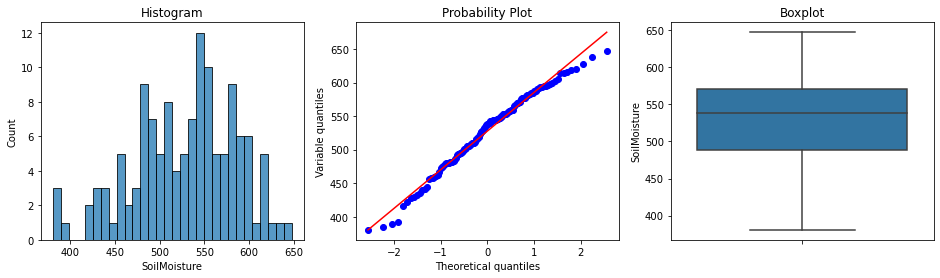

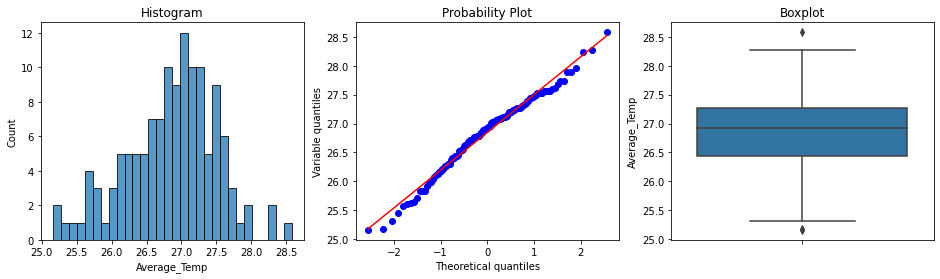

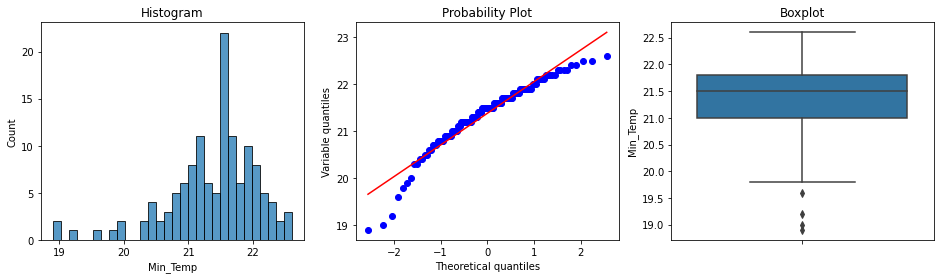

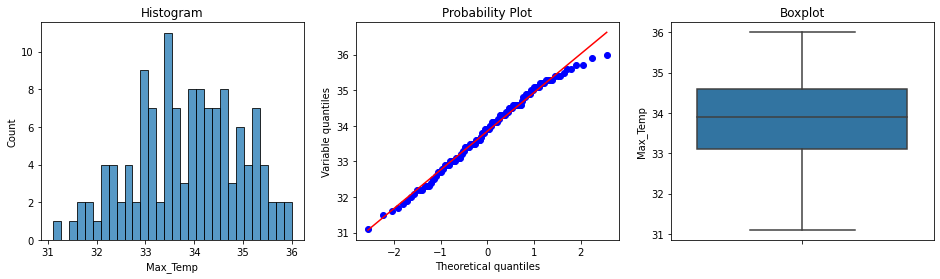

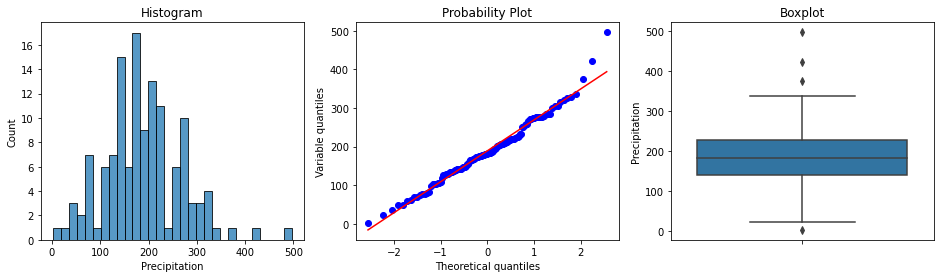

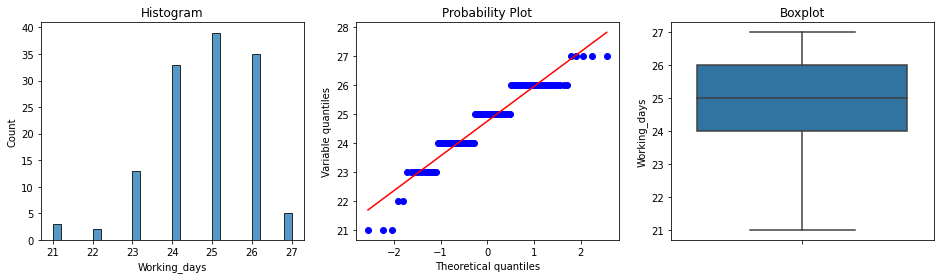

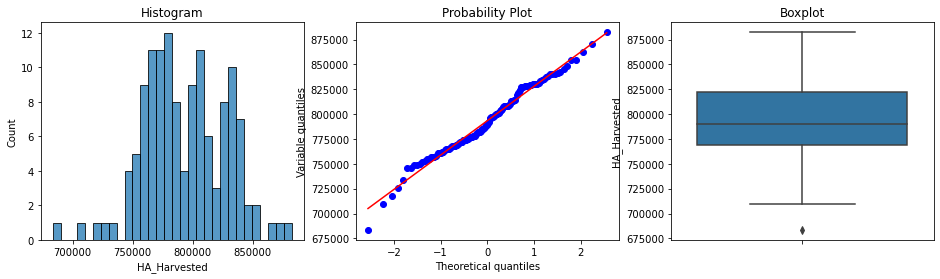

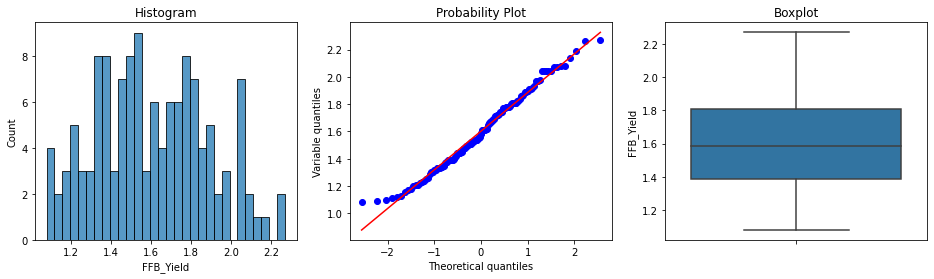

In [12]:
col=['SoilMoisture', 'Average_Temp', 'Min_Temp', 'Max_Temp',
       'Precipitation', 'Working_days', 'HA_Harvested', 'FFB_Yield']

for i in col:
    diagnostic_plots(df, i)

Based on Shapiro-Wilk test previously, histogram, probability plot and boxplot of each attribute visualized, to firm up our understanding on the distribution patterns. Focusing on the non-normally distributed attributes, for Min_temp and Precipitation, it is discovered that the non-normality being contributed by the outliers. Thus, in order to ensure the OLS is not misleading, the outliers must be capped using Winsorization technique. With this transformation, the linearity and distribution can be improved.

In [13]:
df2=df.loc[:,['SoilMoisture', 'Average_Temp','Precipitation', 'Working_days', 'HA_Harvested', 'FFB_Yield']]

To proceed, the OLS model will be developed by using SoilMoisture, Average_Temp,Precipitation, Working_days, HA_Harvested, FFB_Yield as discussed previously. Date will be omitted since the analysis is only to find significant factor, not to do time series forecasting.

In [14]:
# calculate the interquantile range

for column in df2:
  IQR = df2[column].quantile(0.75) - df2[column].quantile(0.25)
  lower_boundary = df2[column].quantile(0.25) - (IQR*1.5)
  upper_boundary = df2[column].quantile(0.75) + (IQR*1.5)
  print('IQR for {} = {} - {}'.format(column,lower_boundary,upper_boundary))

IQR for SoilMoisture = 365.02500000000003 - 694.625
IQR for Average_Temp = 25.19962364875001 - 28.51338709874999
IQR for Precipitation = 11.599999999999966 - 354.8
IQR for Working_days = 21.0 - 29.0
IQR for HA_Harvested = 689433.5198750002 - 901522.664475
IQR for FFB_Yield = 0.7637499999999996 - 2.4337500000000003


In [15]:
df2.columns

Index(['SoilMoisture', 'Average_Temp', 'Precipitation', 'Working_days',
       'HA_Harvested', 'FFB_Yield'],
      dtype='object')

In [16]:
!pip install feature_engine
from feature_engine.outliers import Winsorizer

windsoriser = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=['SoilMoisture', 'Average_Temp', 'Precipitation', 'Working_days',
                                     'HA_Harvested', 'FFB_Yield'])
windsoriser.fit(df2)

Winsorizer(capping_method='iqr', fold=1.5, tail='both',
           variables=['SoilMoisture', 'Average_Temp', 'Precipitation',
                      'Working_days', 'HA_Harvested', 'FFB_Yield'])

In [17]:
df3 = windsoriser.transform(df2)

To ensure the normal distribution and linearity of each attribute, Winsorization technique is implemented. Here, the value of upper boundary and lower boundary of each attribute is capped. Meaning that, all observations greater than the 75th percentile equal to the value at the 75th percentile and all observations less than the 25th percentile equal to the value at the 25th percentile. With this technique, extreme values are rectified within the specified percentile. 

In [18]:
# get the dummies and store it in a variable
dummies = pd.get_dummies(df['Working_days'])

In [19]:
# Concatenate the dummies to original dataframe
df4 = pd.concat([df3, dummies], axis='columns')

In [20]:
# drop the values
df4=df4.drop(['Working_days'], axis='columns')

In [21]:
df4.head()

,SoilMoisture,Average_Temp,Precipitation,HA_Harvested,FFB_Yield,21,22,23,24,25,26,27
0,616.4,25.306452,184.4,777778.3951,1.62,0,0,0,0,1,0,0
1,568.9,26.165517,140.2,767988.2759,1.45,0,0,1,0,0,0,0
2,577.6,25.448387,280.4,783951.9231,1.56,0,0,0,0,1,0,0
3,581.1,26.903333,173.3,788987.0504,1.39,0,0,0,0,1,0,0
4,545.4,27.241935,140.6,813659.7222,1.44,0,0,0,0,1,0,0


In [22]:
df4.set_axis(['SoilMoisture','Average_Temp','Precipitation',
              'HA_Harvested','FFB_Yield','21_working_days','22_working_days','23_working_days',
              '24_working_days','25_working_days','26_working_days','27_working_days'],axis=1,inplace=True)

In [23]:
df4=df4.loc[:,['SoilMoisture','Average_Temp','Precipitation',
              'HA_Harvested','FFB_Yield','21_working_days','22_working_days','23_working_days',
              '24_working_days','25_working_days','26_working_days','27_working_days']]

In [24]:
df4.head()

,SoilMoisture,Average_Temp,Precipitation,HA_Harvested,FFB_Yield,21_working_days,22_working_days,23_working_days,24_working_days,25_working_days,26_working_days,27_working_days
0,616.4,25.306452,184.4,777778.3951,1.62,0,0,0,0,1,0,0
1,568.9,26.165517,140.2,767988.2759,1.45,0,0,1,0,0,0,0
2,577.6,25.448387,280.4,783951.9231,1.56,0,0,0,0,1,0,0
3,581.1,26.903333,173.3,788987.0504,1.39,0,0,0,0,1,0,0
4,545.4,27.241935,140.6,813659.7222,1.44,0,0,0,0,1,0,0


Next, the Working_days attribute is pre-processed. Here, this attribute, which categorical data is encoded using dummies, which consists of 0 and 1, as a code to represent each category; 21_working_days,22_working_days,23_working_days,            24_working_days,25_working_days,26_working_days, and 27_working_days. With this attribute encoded, this attributes can be utilized in the OLS.

In [25]:
df4.describe()

,SoilMoisture,Average_Temp,Precipitation,HA_Harvested,FFB_Yield,21_working_days,22_working_days,23_working_days,24_working_days,25_working_days,26_working_days,27_working_days
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.00000,130.000000,130.000000
mean,527.646923,26.849946,187.295385,793450.657531,1.602231,0.023077,0.015385,0.100000,0.253846,0.30000,0.269231,0.038462
std,57.367844,0.648668,75.013768,34296.057316,0.281751,0.150729,0.123553,0.301161,0.436894,0.46003,0.445276,0.193052
min,380.700000,25.199624,11.600000,689433.519875,1.080000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,488.625000,26.442285,140.300000,768966.949100,1.390000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,538.300000,26.930645,182.150000,790036.158050,1.585000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,571.025000,27.270726,226.100000,821989.235250,1.807500,0.000000,0.000000,0.000000,0.750000,1.00000,1.000000,0.000000
max,647.300000,28.513387,354.800000,882254.225400,2.270000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [26]:
df4.shape

(130, 12)

The descriptive statistics of the dataset being observed again. Here, the minimum and maximum values of each attribute has been updated based on Winsorization. New columns are added; the encoded categorical variable, Working_days is divided into new 6 columns; 21_working_days,22_working_days,23_working_days, 24_working_days,25_working_days,26_working_days, and 27_working_days, based on unique categories identified. Thus, in the updated dataset, it consists of 12 columns and 130 rows.

In [27]:
df4.columns

Index(['SoilMoisture', 'Average_Temp', 'Precipitation', 'HA_Harvested',
       'FFB_Yield', '21_working_days', '22_working_days', '23_working_days',
       '24_working_days', '25_working_days', '26_working_days',
       '27_working_days'],
      dtype='object')

In [28]:
df4['21_working_days'] = df4['21_working_days'].astype(float)
df4['22_working_days'] = df4['22_working_days'].astype(float)
df4['23_working_days'] = df4['23_working_days'].astype(float)
df4['24_working_days'] = df4['24_working_days'].astype(float)
df4['25_working_days'] = df4['25_working_days'].astype(float)
df4['26_working_days'] = df4['26_working_days'].astype(float)
df4['27_working_days'] = df4['27_working_days'].astype(float)

In [29]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SoilMoisture     130 non-null    float64
 1   Average_Temp     130 non-null    float64
 2   Precipitation    130 non-null    float64
 3   HA_Harvested     130 non-null    float64
 4   FFB_Yield        130 non-null    float64
 5   21_working_days  130 non-null    float64
 6   22_working_days  130 non-null    float64
 7   23_working_days  130 non-null    float64
 8   24_working_days  130 non-null    float64
 9   25_working_days  130 non-null    float64
 10  26_working_days  130 non-null    float64
 11  27_working_days  130 non-null    float64
dtypes: float64(12)
memory usage: 12.3 KB


In [30]:
col=['SoilMoisture', 'Average_Temp',
       'Precipitation', 'HA_Harvested', 'FFB_Yield', '21_working_days',
       '22_working_days', '23_working_days', '24_working_days',
       '25_working_days', '26_working_days', '27_working_days']

for i in col:
    stat, p = stats.normaltest(df4[i])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    alpha = 0.05
    if p > alpha:
        print(i,' looks Gaussian (fail to reject H0)')
        print(' ')
    else:
        print(i,' does not look Gaussian (reject H0)')
        print(' ')

Statistics=3.741, p=0.154
SoilMoisture  looks Gaussian (fail to reject H0)
 
Statistics=2.779, p=0.249
Average_Temp  looks Gaussian (fail to reject H0)
 
Statistics=0.607, p=0.738
Precipitation  looks Gaussian (fail to reject H0)
 
Statistics=0.028, p=0.986
HA_Harvested  looks Gaussian (fail to reject H0)
 
Statistics=5.716, p=0.057
FFB_Yield  looks Gaussian (fail to reject H0)
 
Statistics=196.917, p=0.000
21_working_days  does not look Gaussian (reject H0)
 
Statistics=227.832, p=0.000
22_working_days  does not look Gaussian (reject H0)
 
Statistics=84.822, p=0.000
23_working_days  does not look Gaussian (reject H0)
 
Statistics=26.919, p=0.000
24_working_days  does not look Gaussian (reject H0)
 
Statistics=74.498, p=0.000
25_working_days  does not look Gaussian (reject H0)
 
Statistics=32.503, p=0.000
26_working_days  does not look Gaussian (reject H0)
 
Statistics=158.235, p=0.000
27_working_days  does not look Gaussian (reject H0)
 


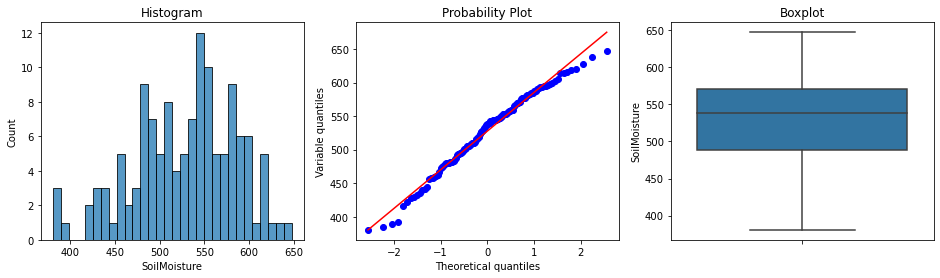

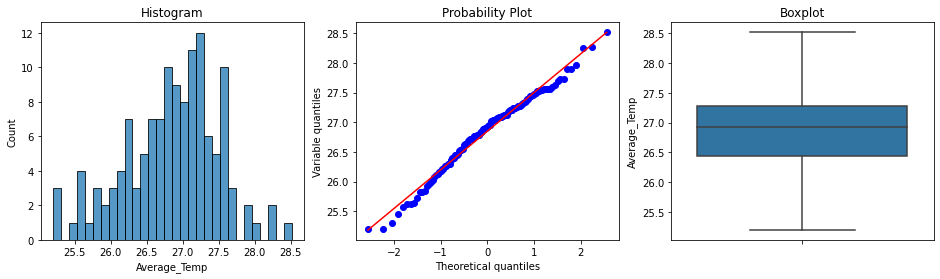

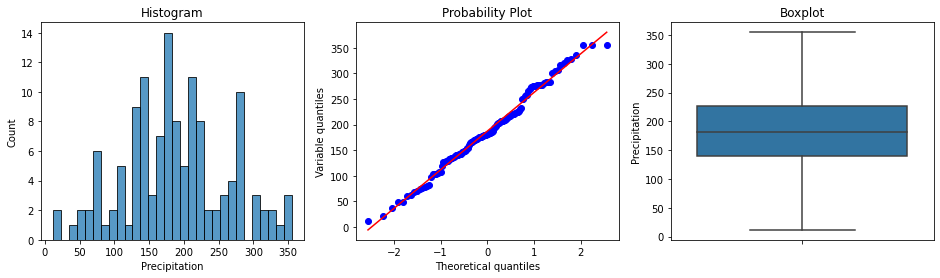

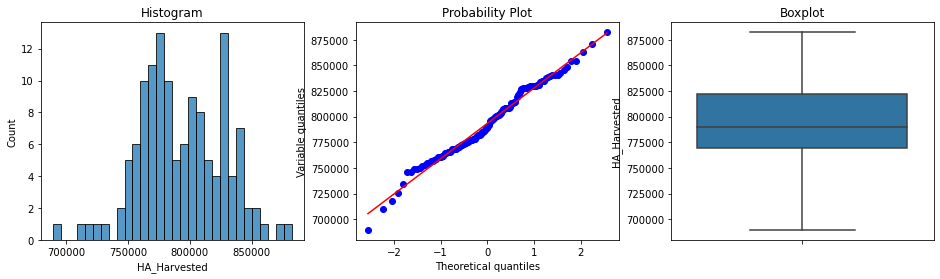

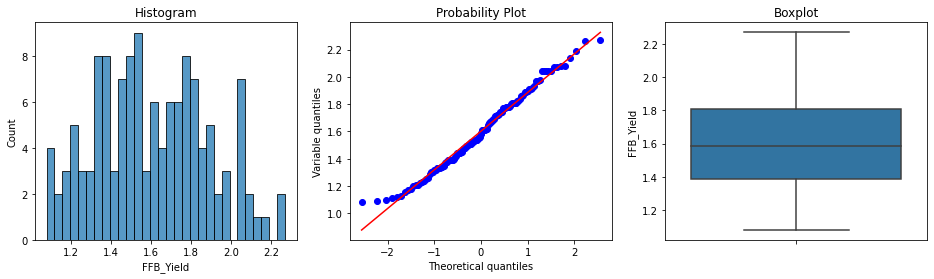

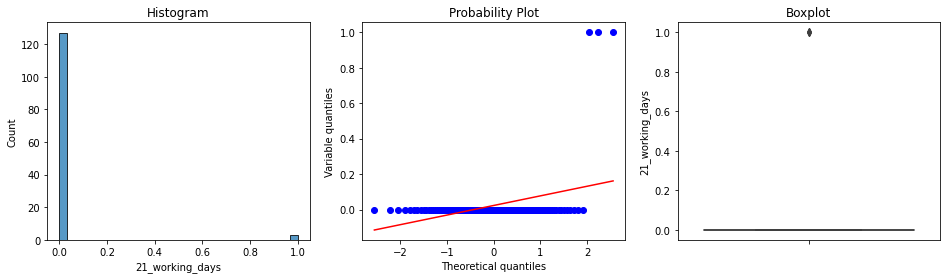

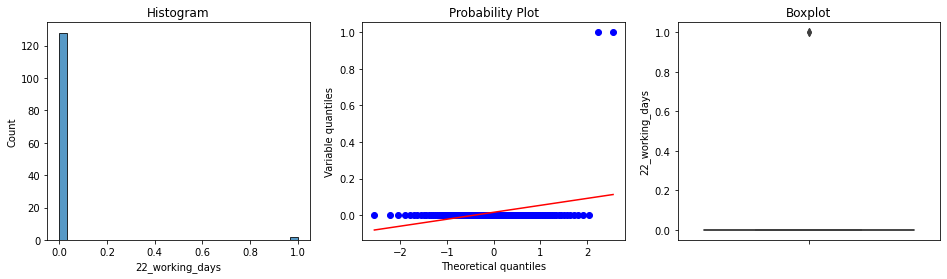

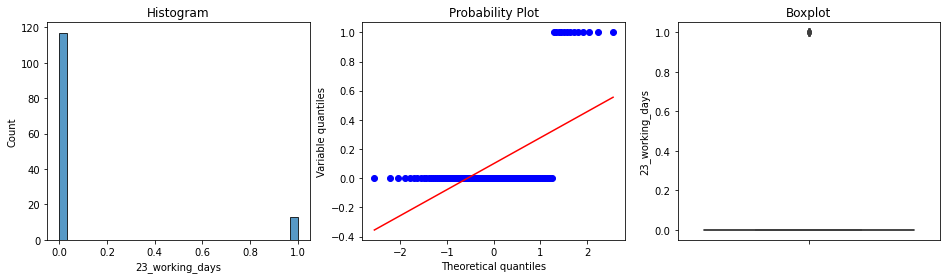

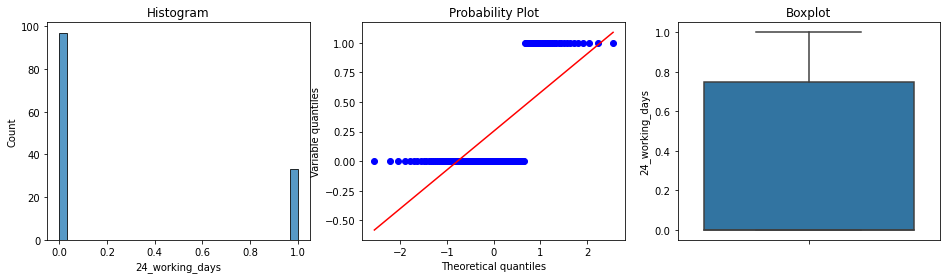

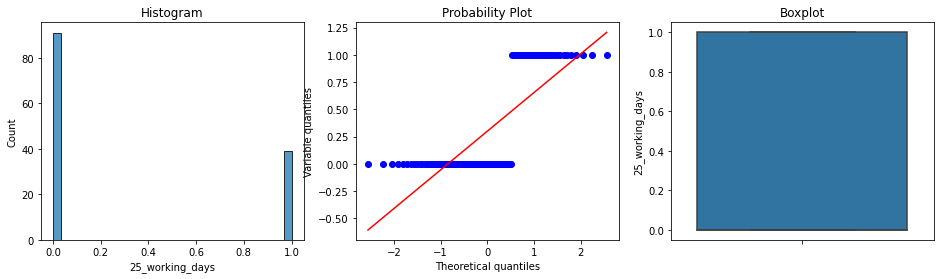

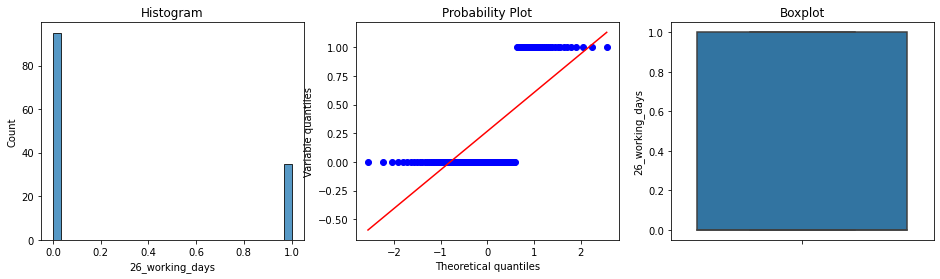

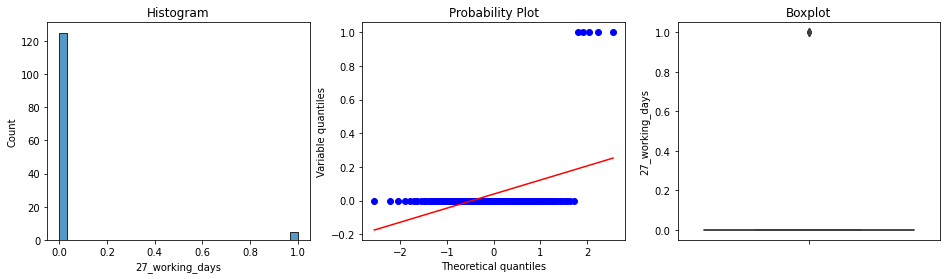

In [31]:
col=['SoilMoisture', 'Average_Temp',
       'Precipitation', 'HA_Harvested', 'FFB_Yield', '21_working_days',
       '22_working_days', '23_working_days', '24_working_days',
       '25_working_days', '26_working_days', '27_working_days']

for i in col:
    diagnostic_plots(df4, i)

Shapiro-Wilk test for normality testing being run again. This time, Precipitation attribute is normally distributed as the extreme values has been capped by Winsorization technique. However, the Working_days attribute is not in normal distribution as the attribute only being encoded for each categories. Then, the distribution being visualized for better understanding.

In [32]:
X, y= df4[['SoilMoisture', 'Average_Temp','Precipitation', 'HA_Harvested', '21_working_days',
       '22_working_days', '23_working_days', '24_working_days','25_working_days', '26_working_days', 
           '27_working_days']], df4[['FFB_Yield']]

In [33]:
X = sm.add_constant(X)

In [34]:
model = sm.OLS(y, X).fit()

In [35]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              FFB_Yield   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     5.153
Date:                Sun, 11 Sep 2022   Prob (F-statistic):           3.03e-06
Time:                        16:41:57   Log-Likelihood:                 4.1005
No. Observations:                 130   AIC:                             13.80
Df Residuals:                     119   BIC:                             45.34
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               2.7055      1.211     

Finally, the OLS model being developed, using statsmodels.api library. Here, it is observed that the p-values of SoilMoisture, Precipitation, HA_Harvested and Working_days are below 0.05. Meaning that, these are the significant factors which influenced the FFB yield. However, in this model, Average_Temp discovered to be not significant. In order to ensure the accurateness of this statistical model, we cross-check the results with technical papers from this domain. Based on Second National Communication (2011) by Ministry of Natural Resources Environment (NRE), Putrajaya, Malaysia, optimum temperature
for oil palm production is between 22°C and 32°C with evenly distributed rainfall at an annual mean between 2000 mm and 3000
mm. Which means, the importance of ambient temperature cannot be ignored. In addition, Oil palm yield can drop by approximately
30%, when the temperature increases by 2°C above the optimum levels and when rainfall decreases by 10%. In addition, heavy rainfall can decrease FFB yields, due to the excess moisture stress experienced by the oil palms (Goh et al., 2002). In terms of Working_days, this factor can be discussed in the perspective of taking care the crops, where the activities including weeding, fertilizing, pruning and harvesting. According to Idris et al. (2006), low fertiliser rate is the main factor that affects FFB yield, which means that low working days will impact the FFB yield negatively.

References :

1) Second National Communication (2011). The Report Submitted to United Nations Framework Convention on Climate Change (UNFCCC). Ministry of Natural Resources Environment (NRE), Putrajaya, Malaysia.
2) Goh, K J; Kee, K K; Chew, P S; Gan, H H; Heng, Y C and Ng, H C P (2002). Concept of site yield potential and its applications in oil palm plantations. Malaysian Oil Sci. Technol., 11: 57-63.
3) Idris, O; Amran, A; Nek, D A and Mohd, H J (2006). Impak Pemindahan Teknologi Pusat TUNAS di Sabah ke Atas Peserta Ladang Pekebun Kecil Sawit. MPOB, Bangi.
4) Sahidan, A. S. (2021, September 30). FACTORS AFFECTING FRESH FRUIT BUNCH YIELDS OF INDEPENDENT SMALLHOLDERS IN SABAH. Oil Palm Industry Economic Journal, 21(2), 22–34. 